In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Generating some synthetic data

In [8]:
# Generate 20 data points
N = 20

# The data is random and is in the domain of (-5, +5) in the x-axis
X = np.random.random(N)*10 - 5

# Gaussian noise is added so the MSE loss function can be used
Y = 0.5 * X - 1 + np.random.randn(N)



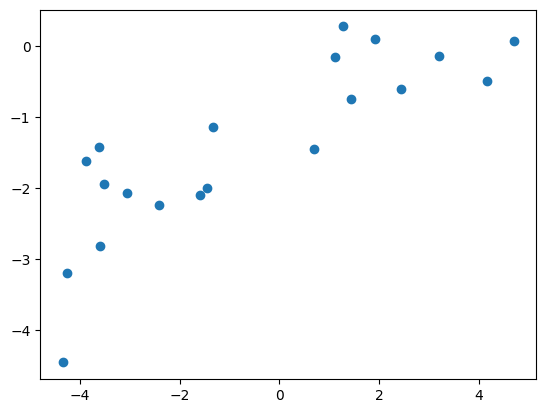

In [9]:
# Plot data
plt.scatter(X, Y);

## PyTorch implementation of Linear Regression model

In [10]:
# 1. Build Model
# Create linear regression model with one input and one output
model = nn.Linear(1, 1)

In [11]:
# Model Loss and Optimizer choice
# Loss
criterion = nn.MSELoss()
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.05)

In [12]:
# Reshaping data
# (num_samples * num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# Cast Data type
# Pytorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

# Check to see data type cast worked
print(type(inputs))

<class 'torch.Tensor'>


In [13]:
# 2. Train loop
n_epochs = 30 # Hyperparam tuning migth be required
losses = [] # List to store losses

for it in range(n_epochs):
  # Zeroing parameter gradients
  # Done as PyToch accumulates gradients during backward pass
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Storing loss to plot later
  losses.append(loss.item()) # When tensor is a single number and we want to
                             # make it compatible we use the item() function

  # Backward pass and optimization
  loss.backward()
  optimizer.step() # one step of gradient descent

  print(f'Epoch: {it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch: 1/30, Loss: 4.8536
Epoch: 2/30, Loss: 3.6331
Epoch: 3/30, Loss: 3.0505
Epoch: 4/30, Loss: 2.5788
Epoch: 5/30, Loss: 2.1929
Epoch: 6/30, Loss: 1.8770
Epoch: 7/30, Loss: 1.6185
Epoch: 8/30, Loss: 1.4070
Epoch: 9/30, Loss: 1.2339
Epoch: 10/30, Loss: 1.0922
Epoch: 11/30, Loss: 0.9763
Epoch: 12/30, Loss: 0.8814
Epoch: 13/30, Loss: 0.8037
Epoch: 14/30, Loss: 0.7402
Epoch: 15/30, Loss: 0.6882
Epoch: 16/30, Loss: 0.6457
Epoch: 17/30, Loss: 0.6108
Epoch: 18/30, Loss: 0.5823
Epoch: 19/30, Loss: 0.5590
Epoch: 20/30, Loss: 0.5399
Epoch: 21/30, Loss: 0.5243
Epoch: 22/30, Loss: 0.5115
Epoch: 23/30, Loss: 0.5011
Epoch: 24/30, Loss: 0.4925
Epoch: 25/30, Loss: 0.4855
Epoch: 26/30, Loss: 0.4798
Epoch: 27/30, Loss: 0.4751
Epoch: 28/30, Loss: 0.4712
Epoch: 29/30, Loss: 0.4681
Epoch: 30/30, Loss: 0.4655


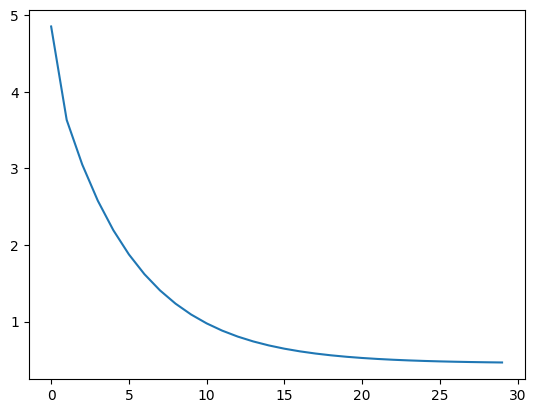

In [14]:
# Plot of the loss per iteration
plt.plot(losses)

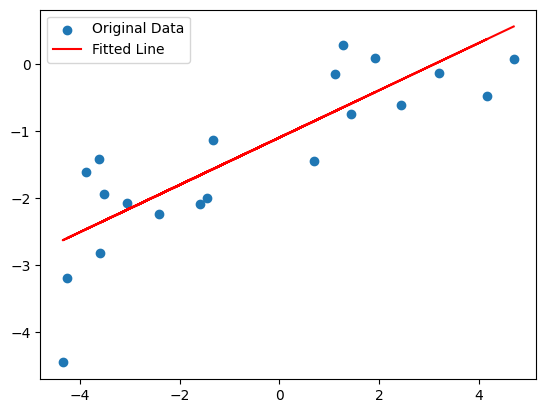

In [15]:
# Plotting the best fit line
predicted = model(inputs).detach().numpy() # since we wish to work with numpy arrays
                                           # we first detach the tensor and call numpy() on it
plt.scatter(X, Y, label="Original Data")
plt.plot(X, predicted, color="red", label="Fitted Line")
plt.legend()
plt.show()


In [16]:
# Alternative way we can get model output without gradients
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-2.179556  ],
       [-0.70252407],
       [-0.588081  ],
       [-0.64809585],
       [-2.6038275 ],
       [-1.5690014 ],
       [-2.3400116 ],
       [-0.2384209 ],
       [ 0.03369212],
       [ 0.37532842],
       [-1.94913   ],
       [-1.6135063 ],
       [-0.8541284 ],
       [-2.633546  ],
       [-1.6613915 ],
       [-2.4667883 ],
       [-0.42087293],
       [-2.3694482 ],
       [-2.3761156 ],
       [ 0.5615908 ]], dtype=float32)

In [17]:
# Checking parameters
# Synthetic data is useful because we will know the exact answer
# True values of w and b are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(f'w: {w}, b: {b}')

w: [[0.3530415]], b: [-1.0986992]
